In [26]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-population-dataset/world_population.csv


# Exploratory Analysis

In [2]:

import numpy as np
import pandas as pd
import seaborn as sns
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import missingno as msno
import plotly.offline as py
from plotly.offline import iplot
import plotly.io as pio
from plotly.offline import init_notebook_mode
py.init_notebook_mode()
import os
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder

In [28]:
# Colors for plots 
colors = ["#1d7874","#679289","#f4c095","#ee2e31","#ffb563","#918450","#f85e00","#a41623","#9a031e","#d6d6d6","#ffee32","#ffd100","#333533","#202020"]

In [3]:
df= pd.read_csv("../input/world-population-dataset/world_population.csv")
df.head()

Rank CCA3 Country/Territory           Capital Continent  2022 Population  \
0    36  AFG       Afghanistan             Kabul      Asia         41128771   
1   138  ALB           Albania            Tirana    Europe          2842321   
2    34  DZA           Algeria           Algiers    Africa         44903225   
3   213  ASM    American Samoa         Pago Pago   Oceania            44273   
4   203  AND           Andorra  Andorra la Vella    Europe            79824   

   2020 Population  2015 Population  2010 Population  2000 Population  \
0         38972230         33753499         28189672         19542982   
1          2866849          2882481          2913399          3182021   
2         43451666         39543154         35856344         30774621   
3            46189            51368            54849            58230   
4            77700            71746            71519            66097   

   1990 Population  1980 Population  1970 Population  Area (km²)  \
0         10694796         12486631         10752971      652230   
1          3295066          2941651          2324731       28748   
2         25518074         18739378         13795915     2381741   
3            47818            32886            27075         199   
4            53569            35611            19860         468   

   Density (per km²)  Growth Rate  World Population Percentage  
0            63.0587       1.0257                         0.52  
1            98.8702       0.9957                         0.04  
2            18.8531       1.0164                         0.56  
3           222.4774       0.9831                         0.00  
4           170.5641       1.0100                         0.00

**Data Exploration**

In [30]:
df.isnull().sum()

Rank                           0
CCA3                           0
Country/Territory              0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64

In [31]:
df.duplicated().sum()

0

Data ia clean there is no missing or duplcate value

In [32]:
print(df.shape)

(234, 17)


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

In [34]:
df.describe().T.sort_values(ascending = 0,by = "mean").style.background_gradient(cmap = "viridis")

# data preaperation 

In [4]:
# Renaming year columns from "Country/Territory" to "Country" for shorter name

df.rename(columns = {'Country/Territory':'Country'}, inplace = True)
        
df.head()

Rank CCA3         Country           Capital Continent  2022 Population  \
0    36  AFG     Afghanistan             Kabul      Asia         41128771   
1   138  ALB         Albania            Tirana    Europe          2842321   
2    34  DZA         Algeria           Algiers    Africa         44903225   
3   213  ASM  American Samoa         Pago Pago   Oceania            44273   
4   203  AND         Andorra  Andorra la Vella    Europe            79824   

   2020 Population  2015 Population  2010 Population  2000 Population  \
0         38972230         33753499         28189672         19542982   
1          2866849          2882481          2913399          3182021   
2         43451666         39543154         35856344         30774621   
3            46189            51368            54849            58230   
4            77700            71746            71519            66097   

   1990 Population  1980 Population  1970 Population  Area (km²)  \
0         10694796         12486631         10752971      652230   
1          3295066          2941651          2324731       28748   
2         25518074         18739378         13795915     2381741   
3            47818            32886            27075         199   
4            53569            35611            19860         468   

   Density (per km²)  Growth Rate  World Population Percentage  
0            63.0587       1.0257                         0.52  
1            98.8702       0.9957                         0.04  
2            18.8531       1.0164                         0.56  
3           222.4774       0.9831                         0.00  
4           170.5641       1.0100                         0.00

In [5]:
# Renaming year columns from "Year Population" to just "Year" for shorter name

for col in df.columns:
    if 'Population' and '0' in col:
        df = df.rename(columns={col: col.split(' ')[0]})
        
df.head()

Rank CCA3         Country           Capital Continent      2022      2020  \
0    36  AFG     Afghanistan             Kabul      Asia  41128771  38972230   
1   138  ALB         Albania            Tirana    Europe   2842321   2866849   
2    34  DZA         Algeria           Algiers    Africa  44903225  43451666   
3   213  ASM  American Samoa         Pago Pago   Oceania     44273     46189   
4   203  AND         Andorra  Andorra la Vella    Europe     79824     77700   

       2015      2010      2000      1990      1980      1970  Area (km²)  \
0  33753499  28189672  19542982  10694796  12486631  10752971      652230   
1   2882481   2913399   3182021   3295066   2941651   2324731       28748   
2  39543154  35856344  30774621  25518074  18739378  13795915     2381741   
3     51368     54849     58230     47818     32886     27075         199   
4     71746     71519     66097     53569     35611     19860         468   

   Density (per km²)  Growth Rate  World Population Percentage  
0            63.0587       1.0257                         0.52  
1            98.8702       0.9957                         0.04  
2            18.8531       1.0164                         0.56  
3           222.4774       0.9831                         0.00  
4           170.5641       1.0100                         0.00

In [37]:
sns.set_style("white")
sns.set(rc={"axes.facecolor":"white","figure.facecolor":"white"})
sns.set_context("poster",font_scale = .7)

palette = ["#006837","#1A9850","#66BD63","#A6D96A","#D9EF8B","#FFFFBF","#FEE08B","#FDAE61","#F46D43","#D73027","#A50026"]
palette_cmap =['viridis']

In [38]:
catcol = ["CCA3","Country","Capital","Continent"]
le = LabelEncoder()
for col in catcol:
        df[col] = le.fit_transform(df[col])

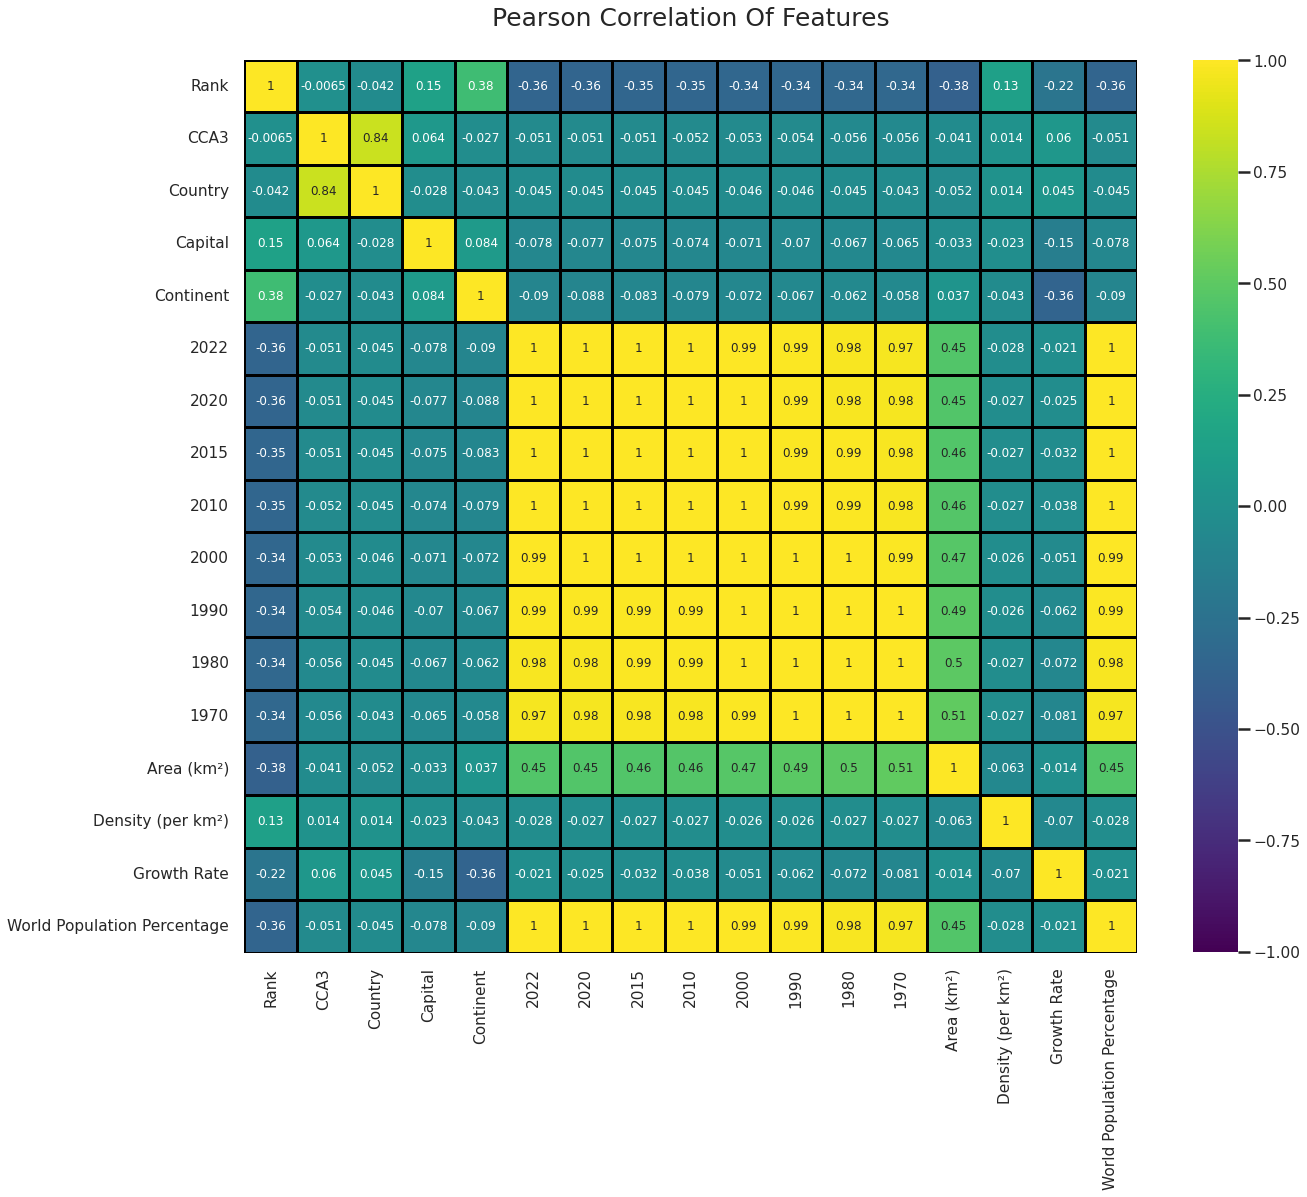

In [39]:
plt.subplots(figsize =(20, 20))

sns.heatmap(df.corr(), cmap = 'viridis', square=True, cbar_kws=dict(shrink =.82), 
            annot=True, vmin=-1, vmax=1, linewidths=3,linecolor='black',annot_kws=dict(fontsize =12))
plt.title("Pearson Correlation Of Features\n", fontsize=25)
plt.xticks(rotation=90)
plt.show()

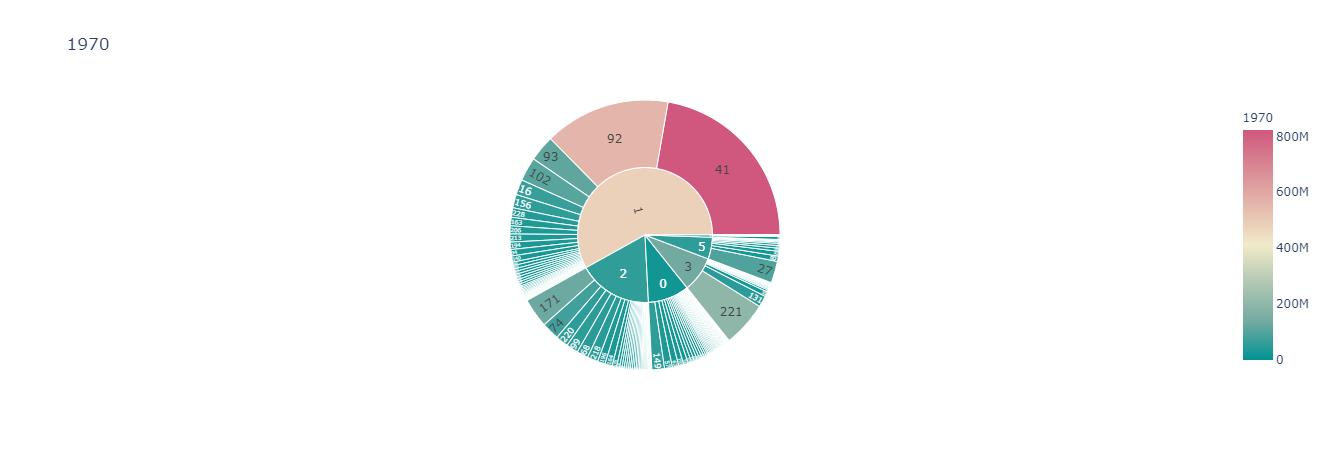

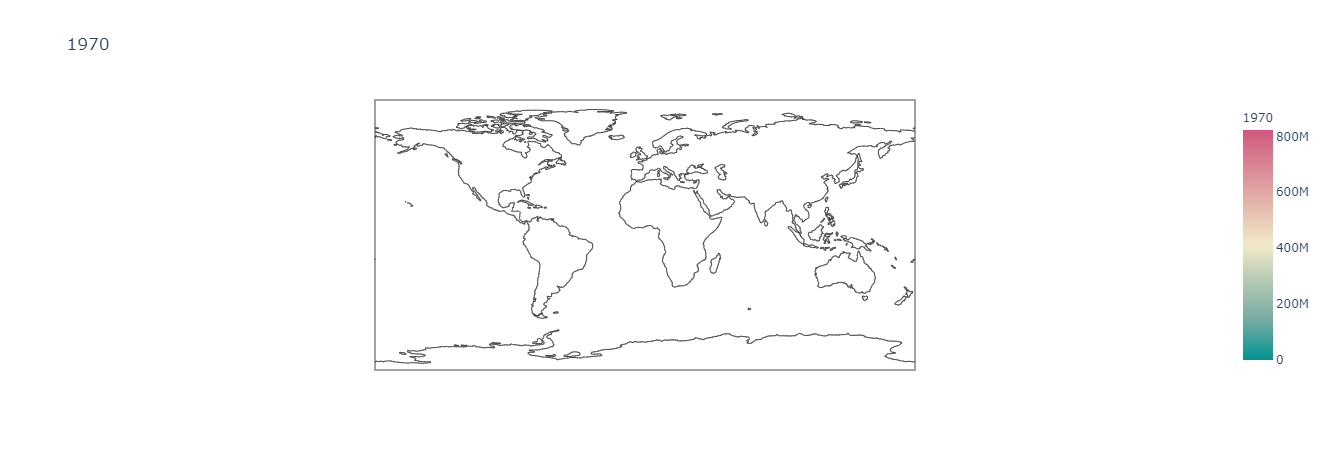

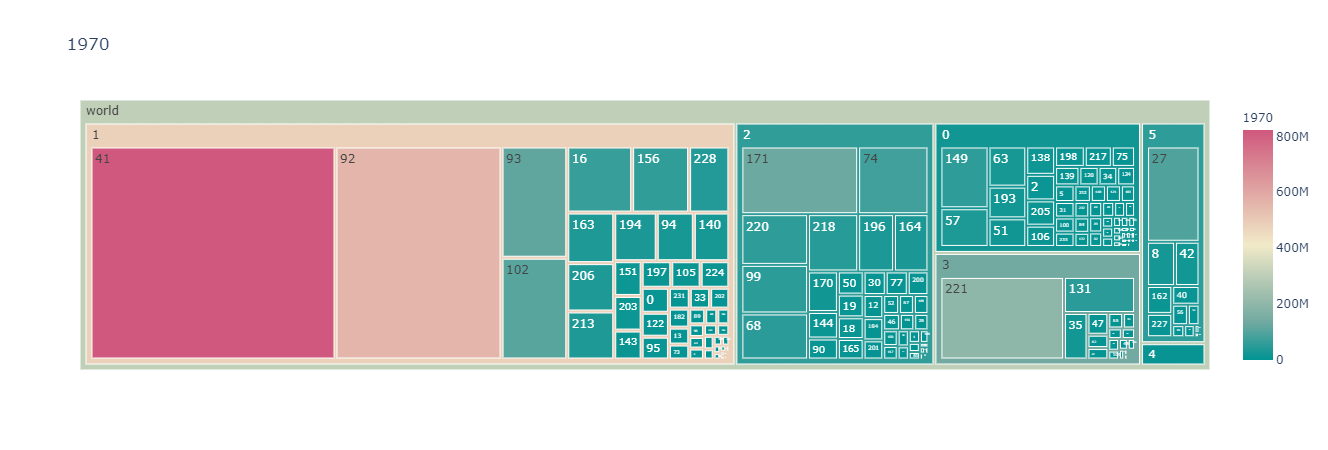

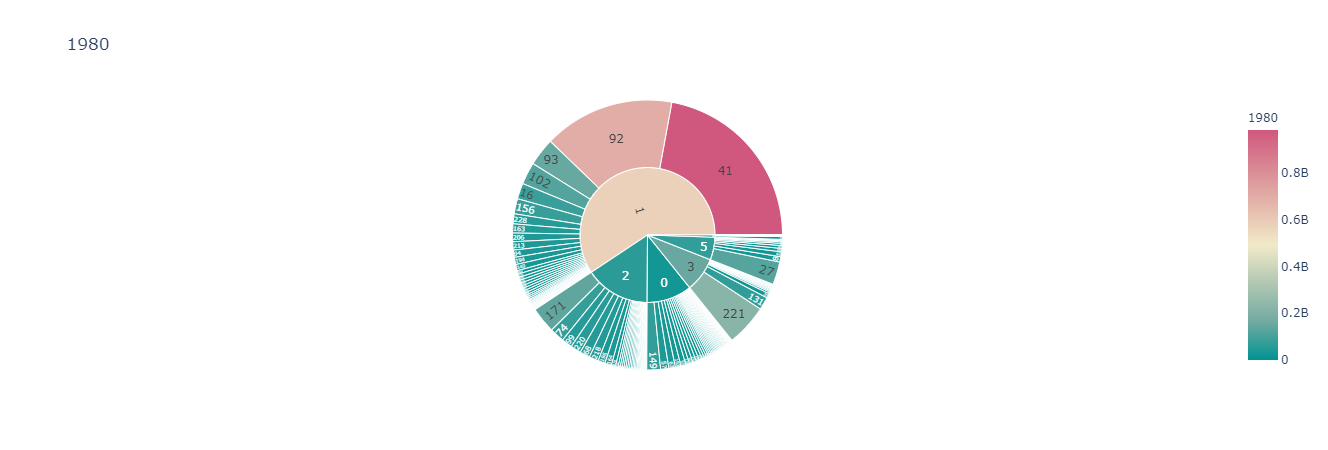

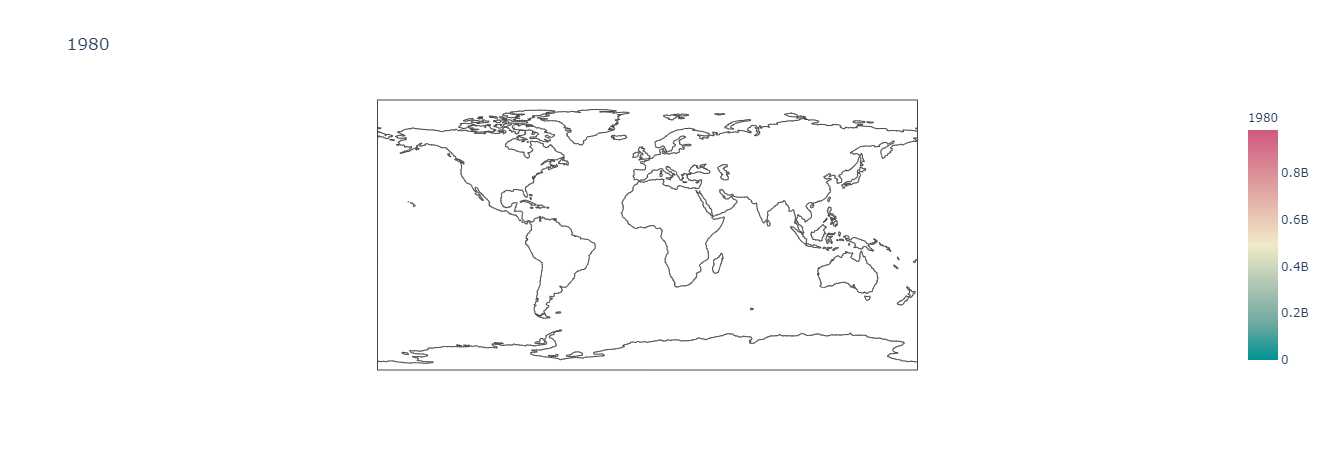

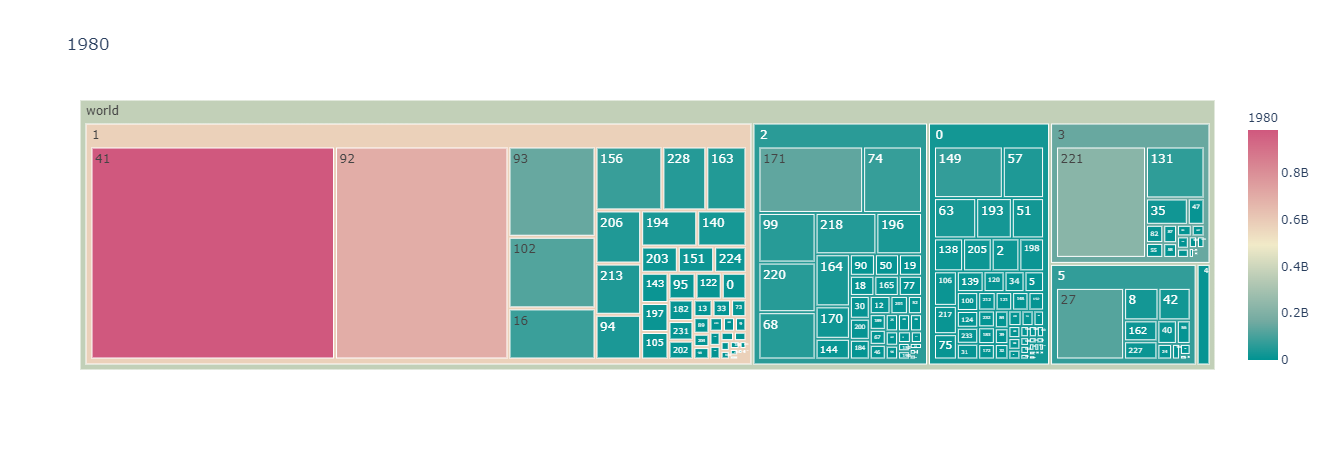

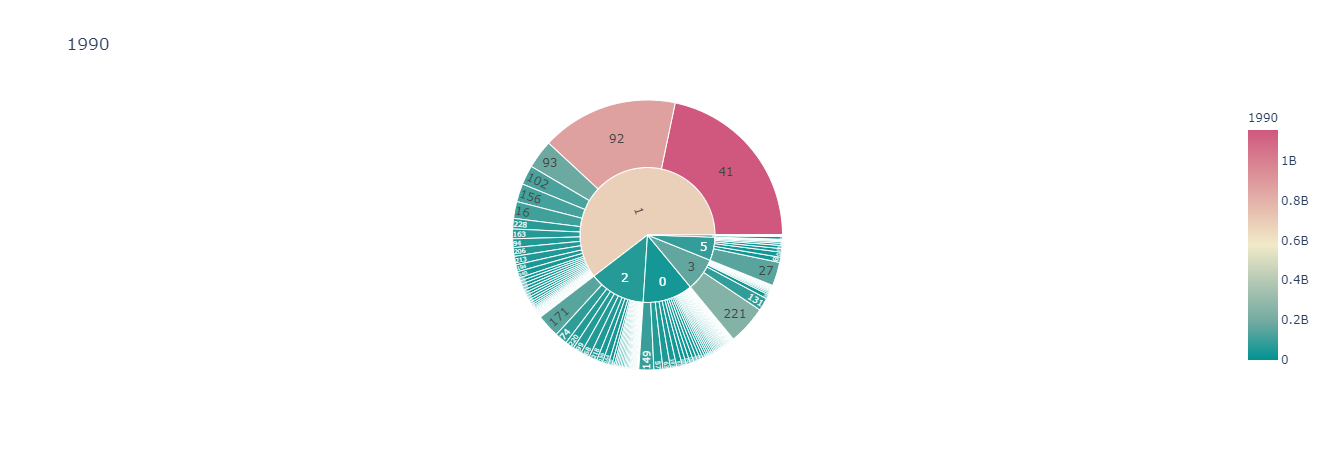

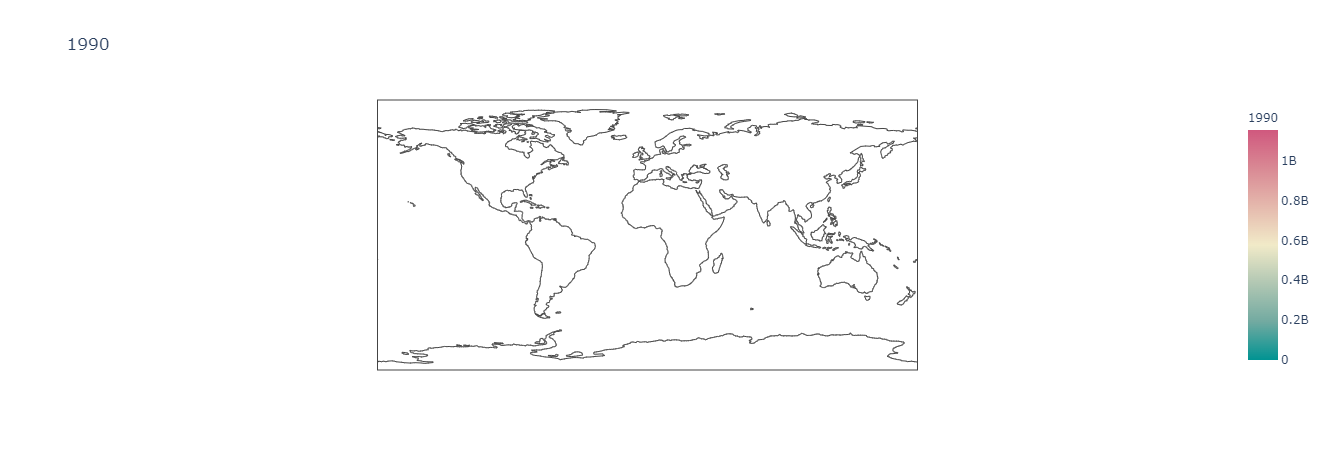

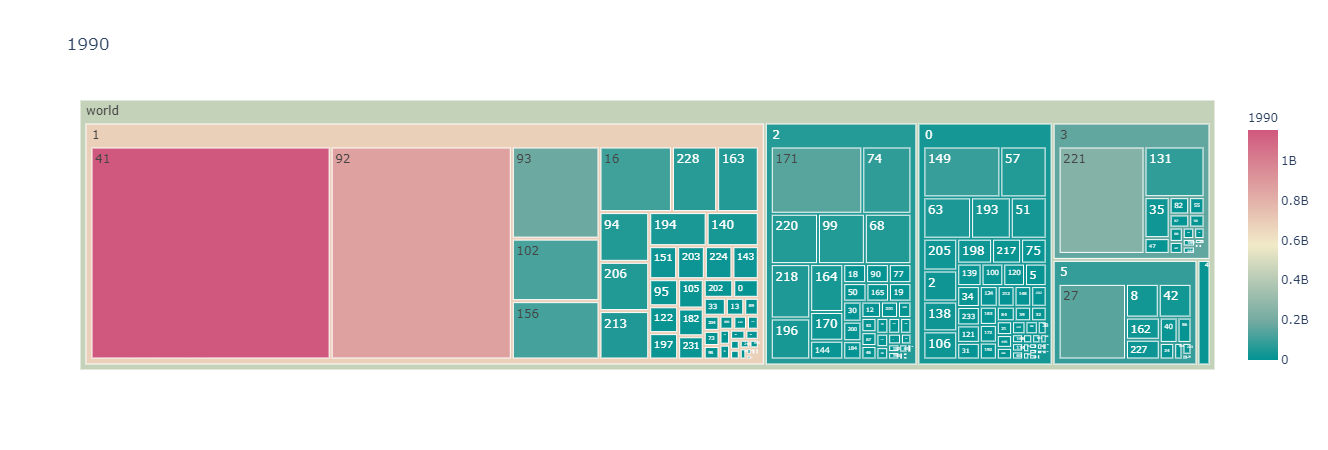

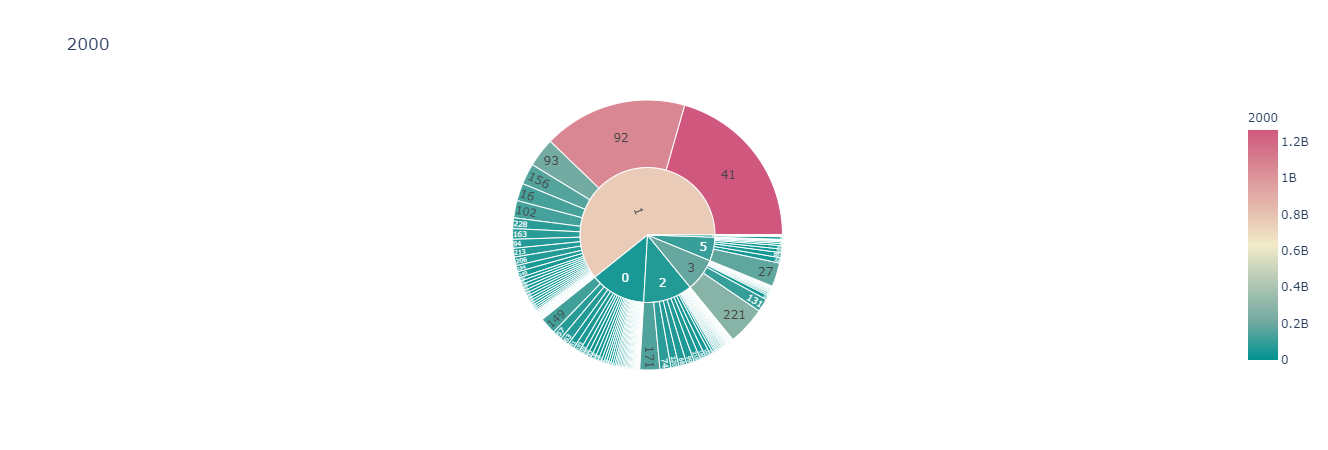

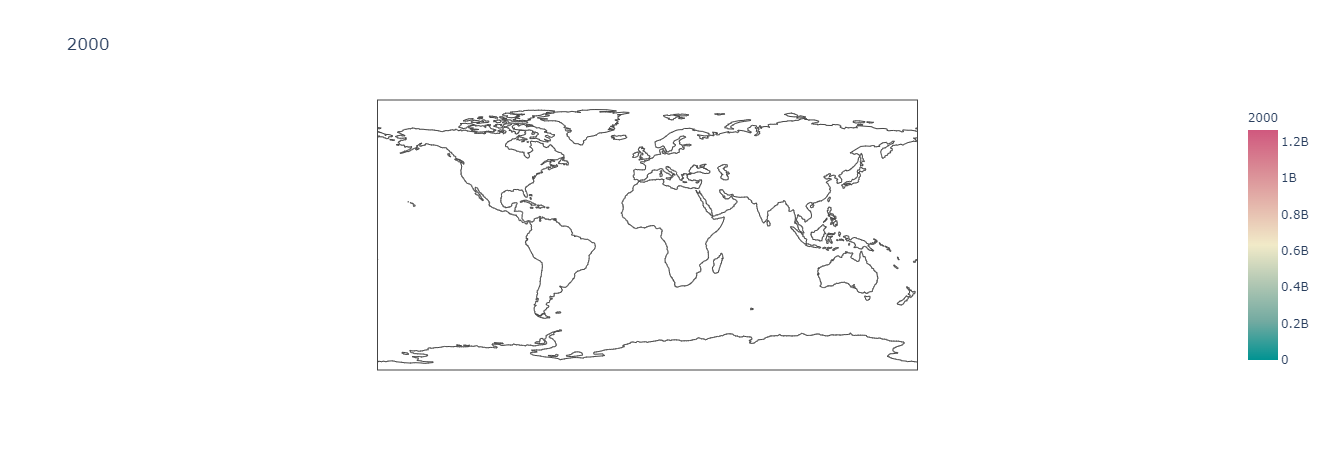

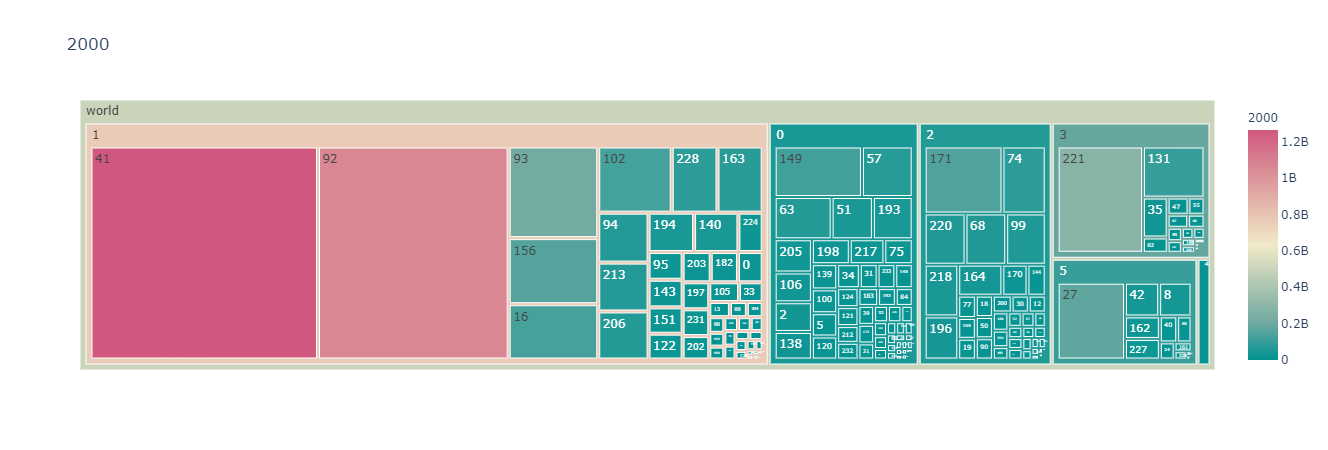

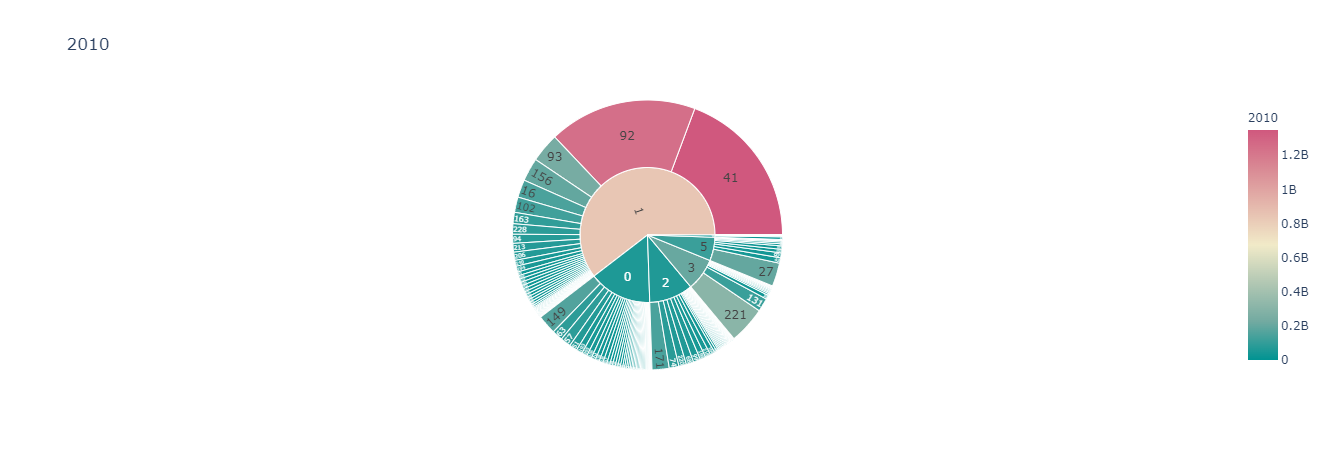

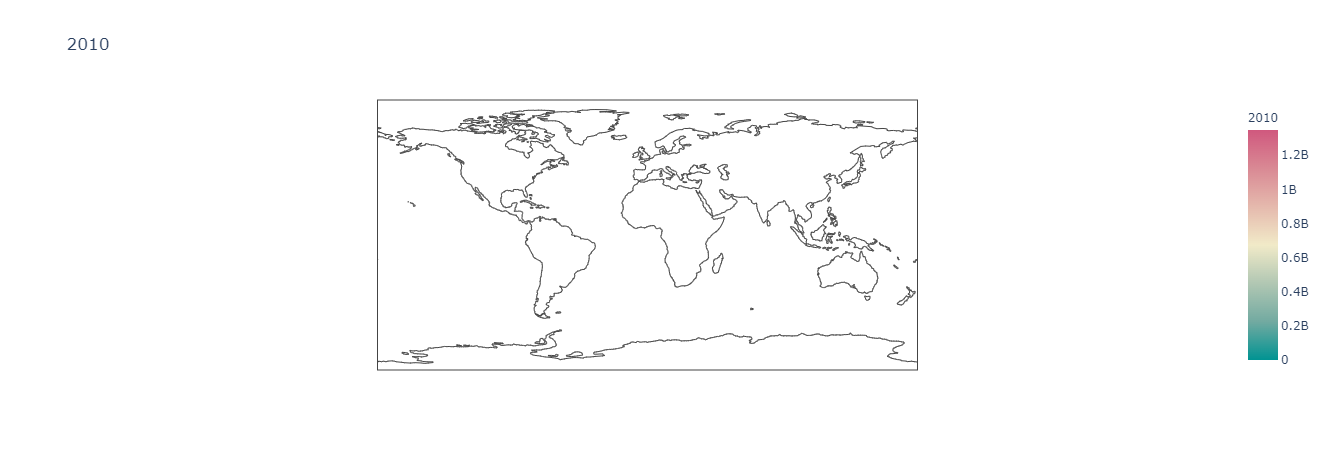

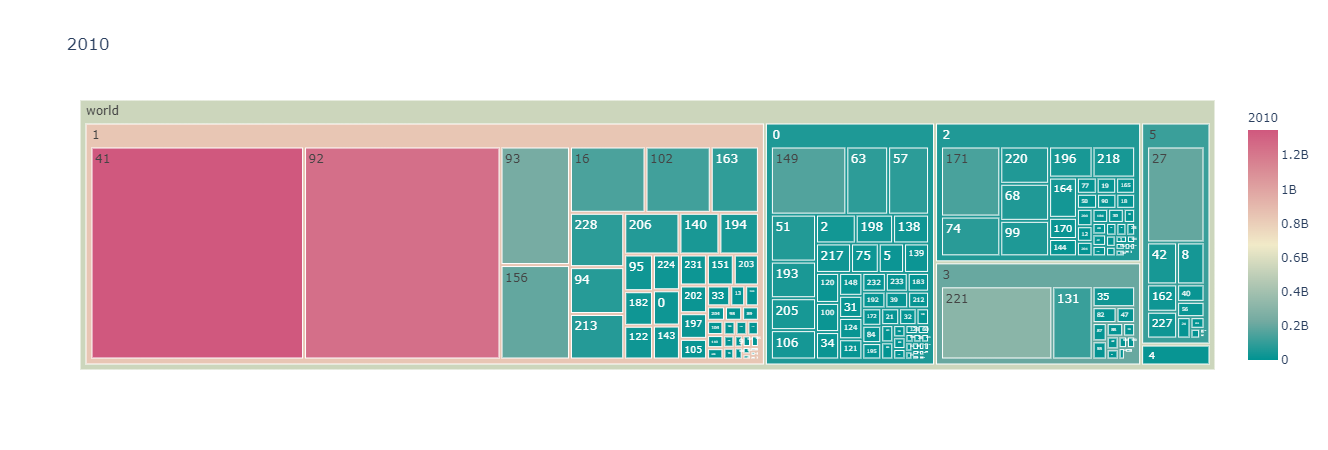

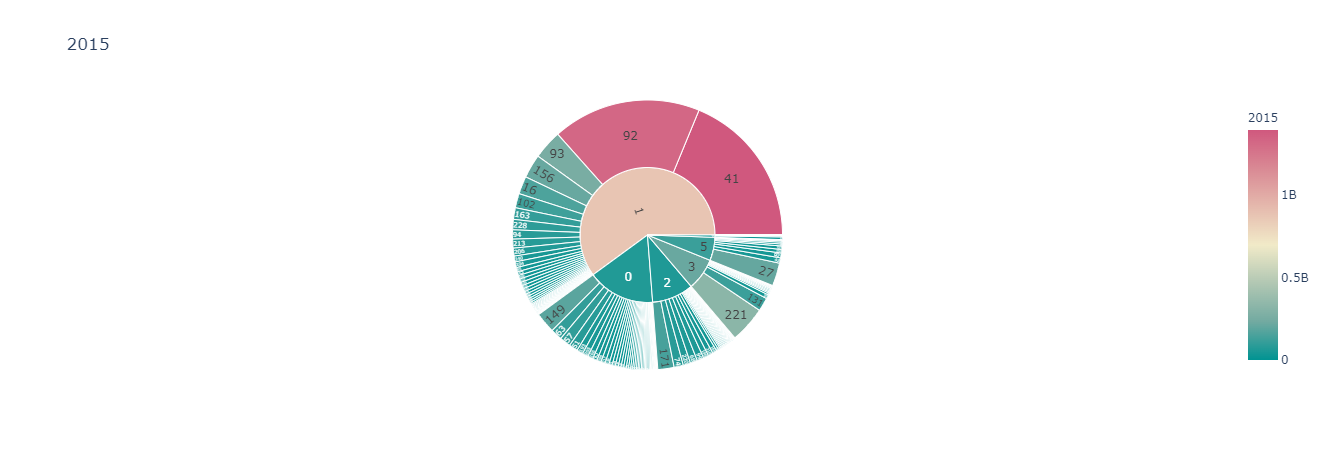

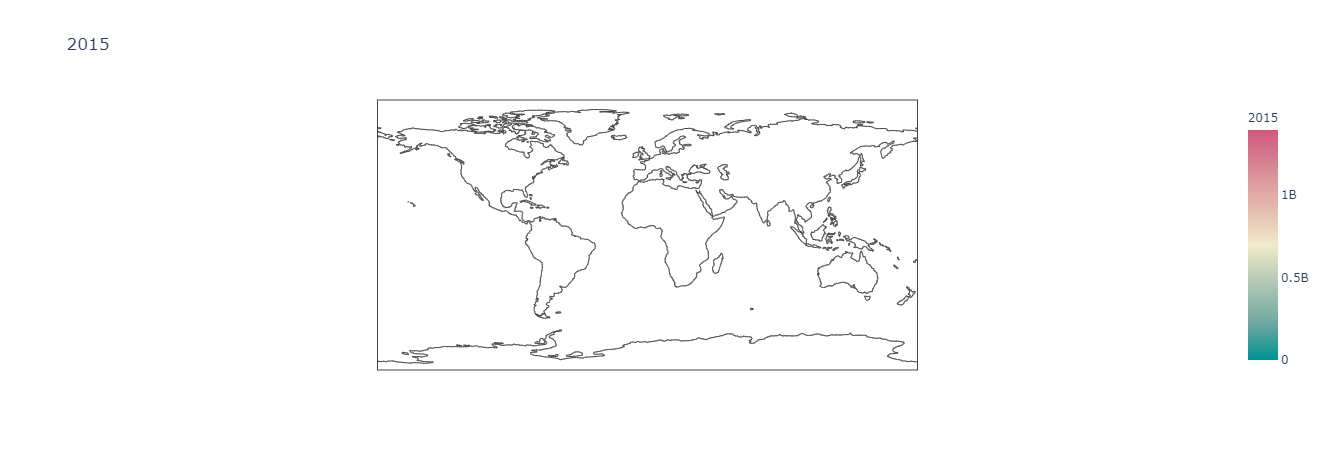

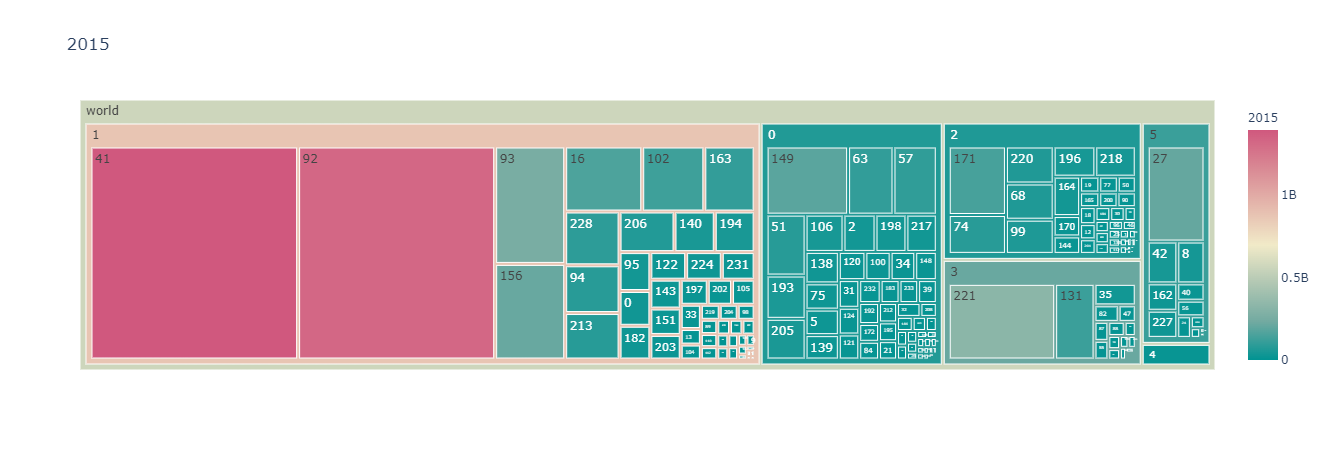

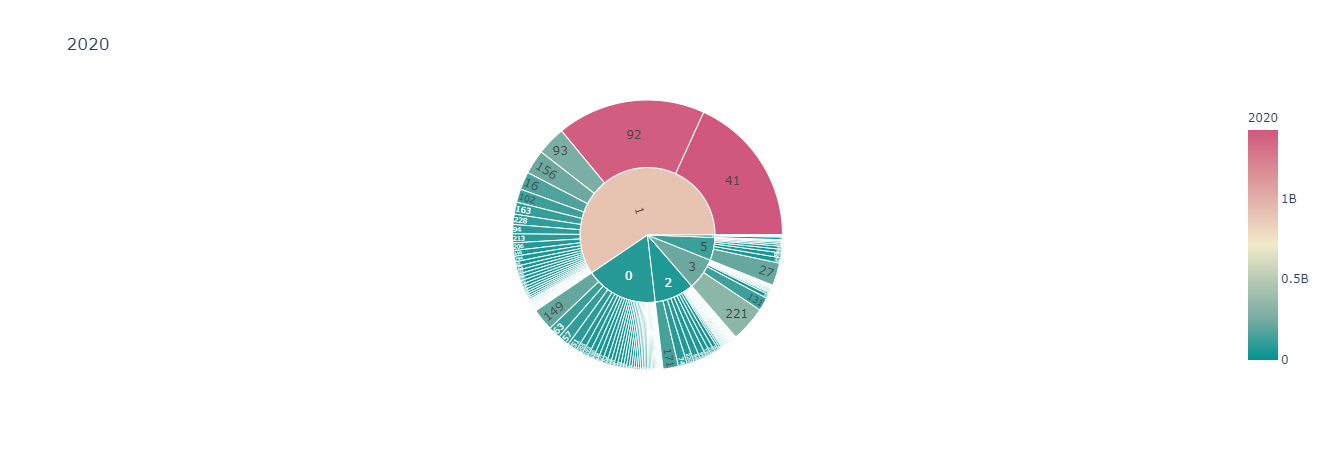

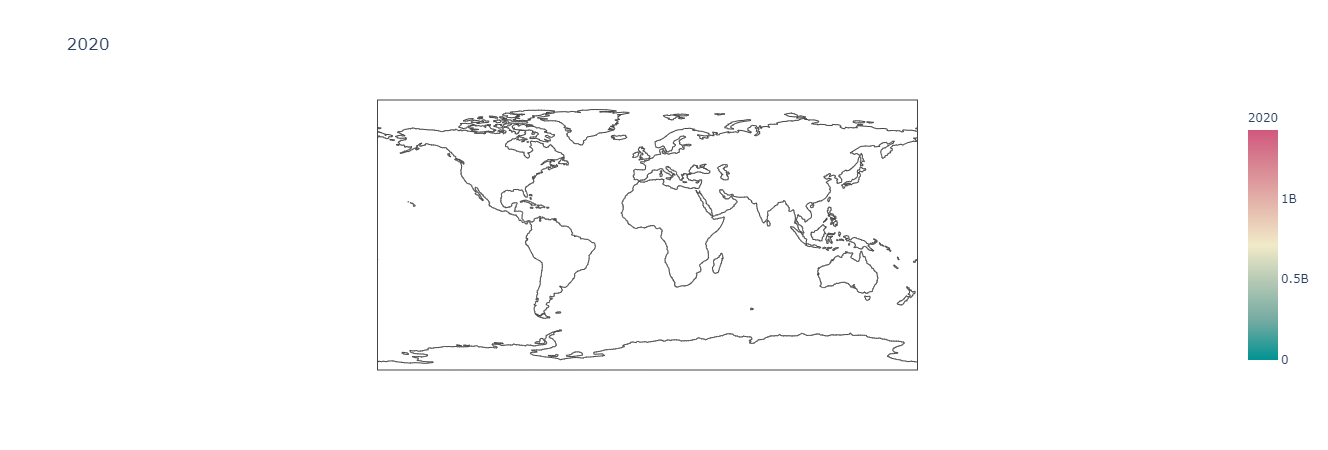

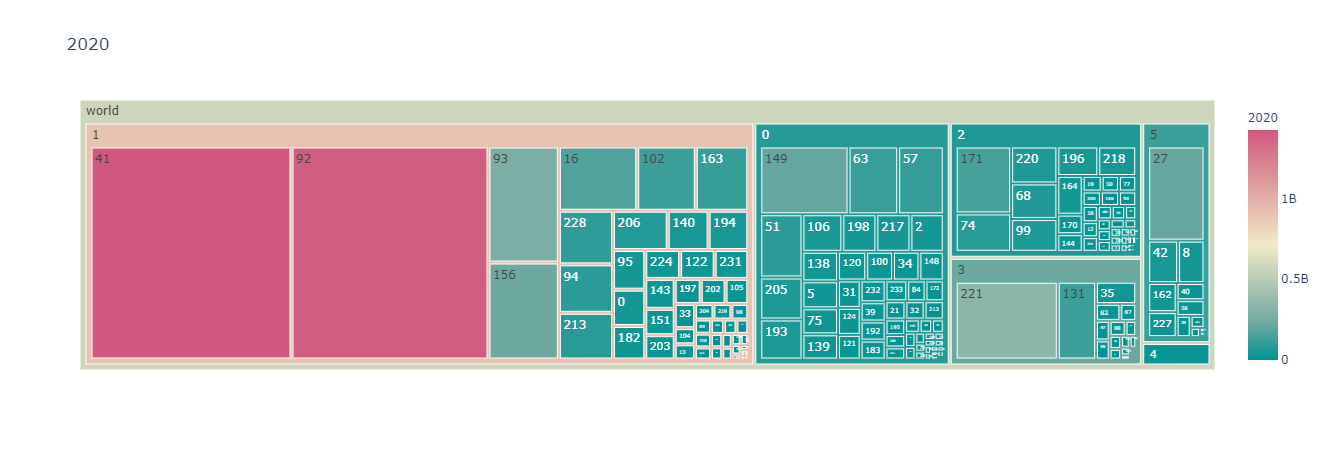

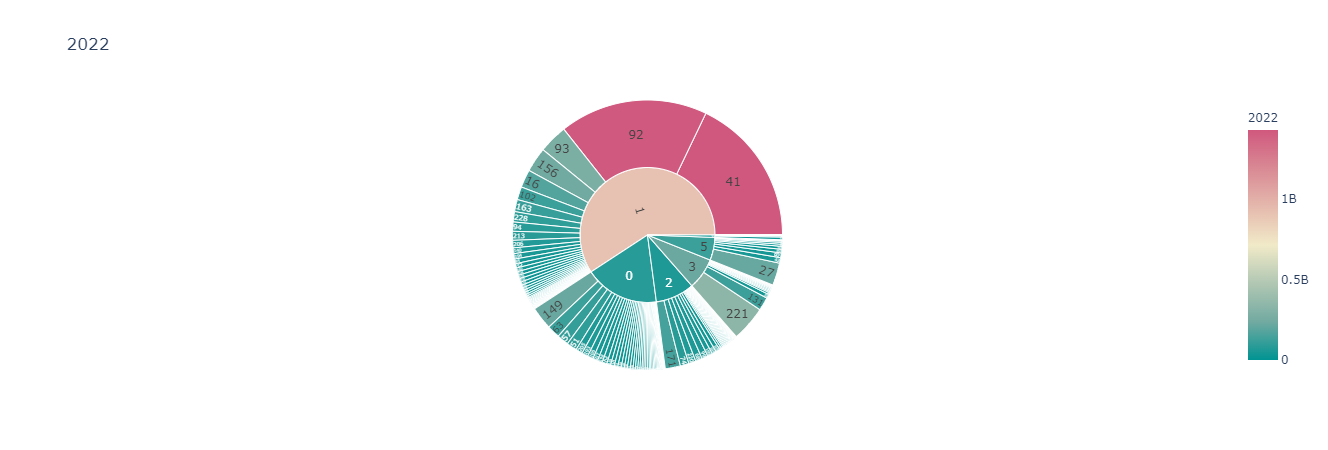

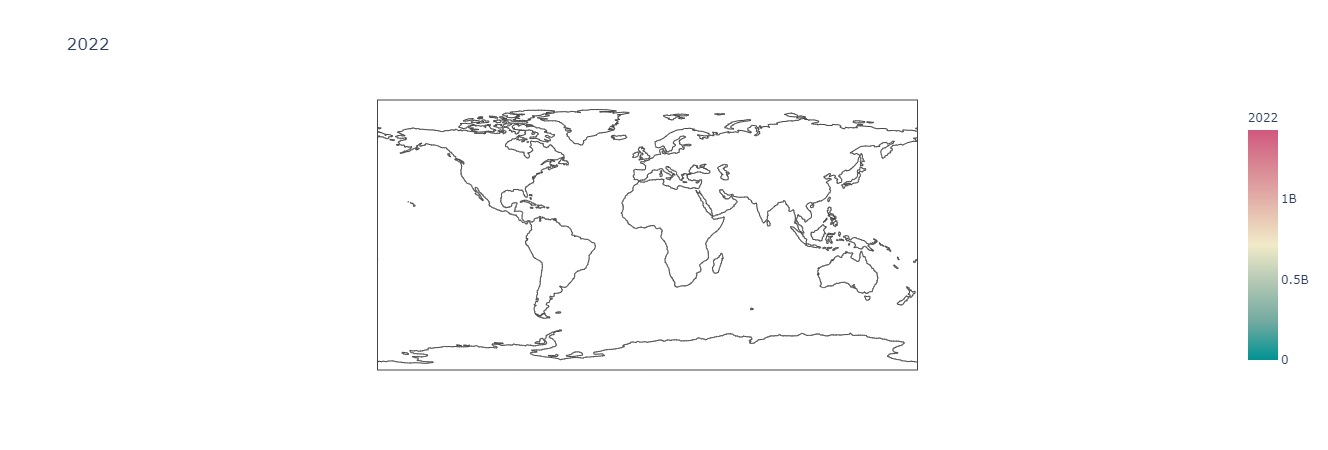

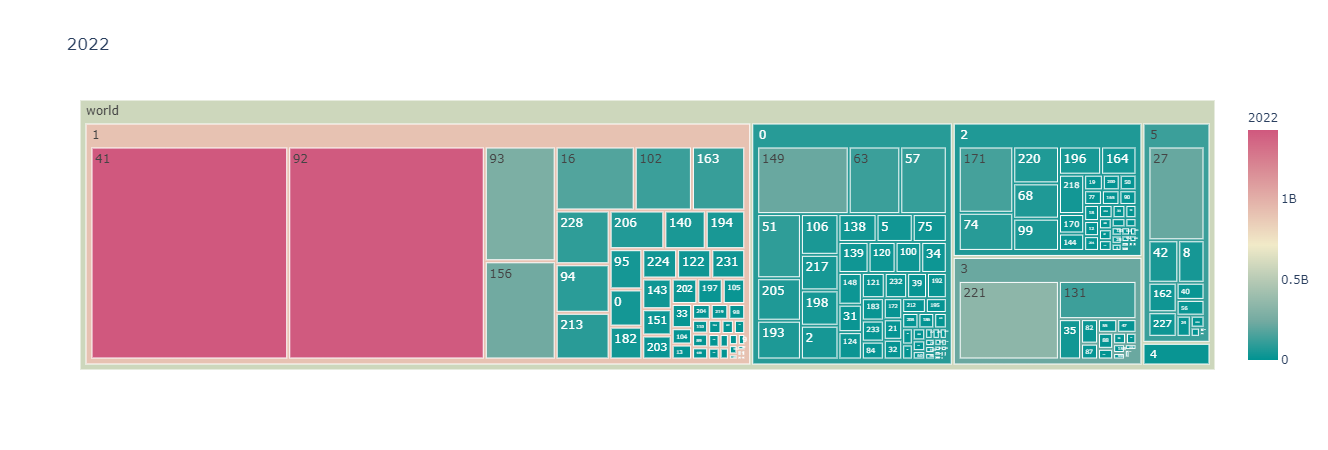

In [40]:
years=['1970','1980','1990','2000','2010','2015','2020','2022']
for x in years:
    fig = px.sunburst(df, path=['Continent', 'Country'], values=x,color_continuous_scale='Tealrose',
                 template='plotly_white', color=x,title=x)
    fig.show()
    fig = px.choropleth(df,
                     locations='Country',
                     locationmode='country names',
                     color=x,
                     color_continuous_scale='Tealrose',
                     template='plotly_white',
                     title = x)

    fig.show()

    fig = px.treemap(df, path=[px.Constant("world"), 'Continent', 'Country'], values=x,
                  color=x,template='plotly_white',title = x,
                  color_continuous_scale='Tealrose')
    fig.show()

In [41]:
by_continent = df.groupby('Continent').sum().sort_values(by = '2022',ascending = True)

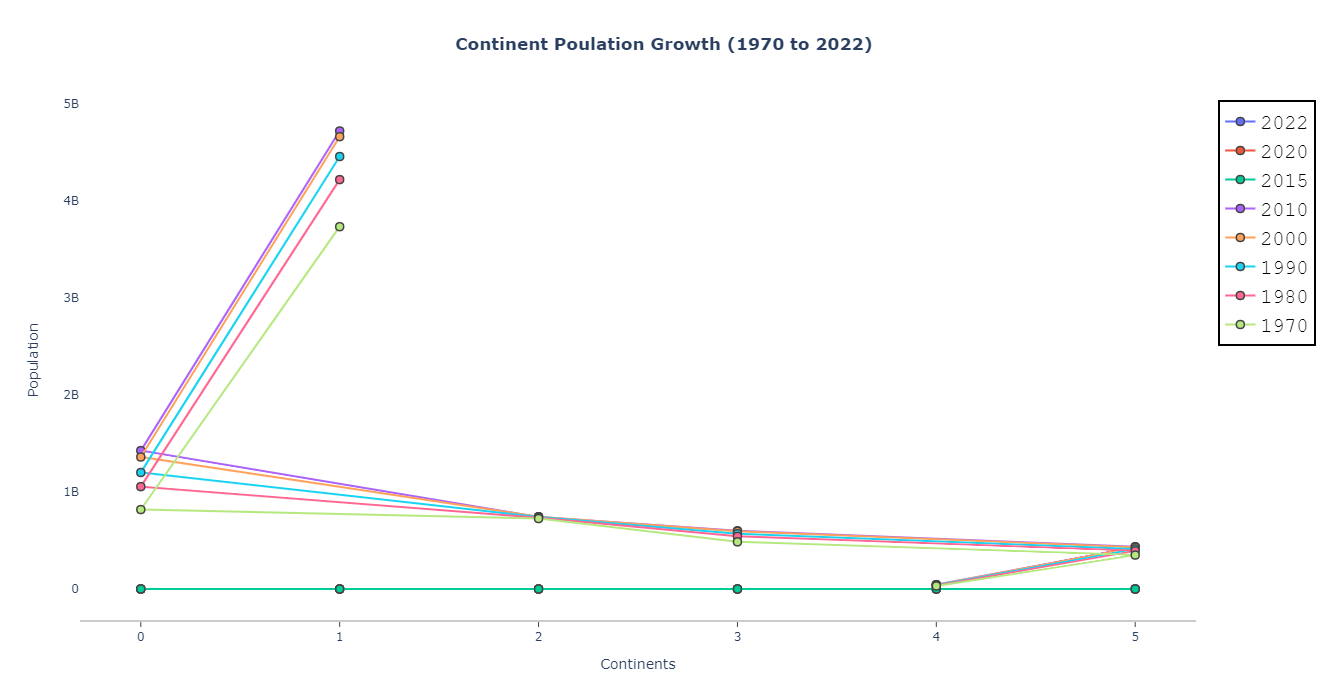

In [42]:
x = by_continent.index
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=by_continent.iloc[:,1].values, name="2022",marker = dict(size = 8,line_width=1.5),
                     mode='lines'))
fig.add_trace(go.Scatter(x=x, y=by_continent.iloc[:,2].values, name="2020",marker = dict(size = 8,line_width=1.5),
                     mode='lines'))
fig.add_trace(go.Scatter(x=x, y=by_continent.iloc[:,3].values, name="2015",marker = dict(size = 8,line_width=1.5),
                     mode='lines'))
fig.add_trace(go.Scatter(x=x, y=by_continent.iloc[:,4].values, name="2010",marker = dict(size = 8,line_width=1.5),
                     mode='lines'))
fig.add_trace(go.Scatter(x=x, y=by_continent.iloc[:,5].values, name="2000",marker = dict(size = 8,line_width=1.5),
                     mode='lines'))
fig.add_trace(go.Scatter(x=x, y=by_continent.iloc[:,6].values, name="1990",marker = dict(size = 8,line_width=1.5),
                     mode='lines'))
fig.add_trace(go.Scatter(x=x, y=by_continent.iloc[:,7].values, name="1980",marker = dict(size = 8,line_width=1.5),
                     mode='lines'))
fig.add_trace(go.Scatter(x=x, y=by_continent.iloc[:,8].values, name="1970",marker = dict(size = 8,line_width=1.5),
                     mode='lines'))

fig.update_traces(mode='lines+markers')
fig.update_layout(
    title = {
        'text': "<b>Continent Poulation Growth (1970 to 2022)</b>",
        'x':0.5,
        'xanchor': 'center'},
    
     xaxis=dict(
        title = 'Continents',
        showline=True,
        showgrid = False,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside'),
    
    yaxis = dict(
        title = 'Population',
        showgrid = False),
    
        legend=dict(
        title_font_family="Times New Roman",
        font=dict(
            family="Courier",
            size=20,
            color="black"),
        bgcolor="white",
        bordercolor="Black",
        borderwidth=2),
    
    width = 950,
    height = 700,
    plot_bgcolor='white'
)
iplot(fig)

* The Population growth of Asia (1970 to 2022) is from 2.144 Billions to 4.721 Billions with difference of 2.577 Billions.
* The Population growth of Africa (1970 to 2022) is from 365.44 Millions to 1.426 Billions with difference of 1.06 Billions.
* The Population growth of Europe (1970 to 2022) is from 655.94 Millions to 745.79 Millions with difference of 89.85 Millions.
* The Population growth of North America (1970 to 2022) is from 315.43 Millions to 600.269 Millions with difference of 284.839 Millions.
* The Population growth of South America (1970 to 2022) is from 192.94 Millions to 436.81 Millions with difference of 243.87 Millions.
* The Population growth of Oceania (1970 to 2022) is from 19.480 Millions to 45.038 Millions with difference of 25.558 Millions.

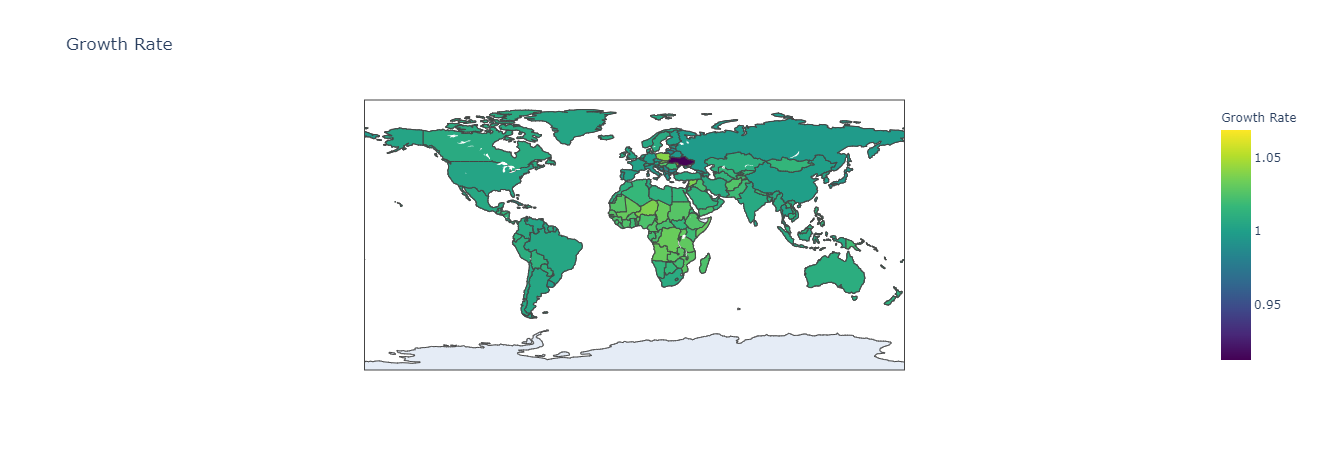

In [8]:
#Growth Rate
fig = px.choropleth(df,
                    locations='Country',
                    locationmode='country names',
                    color='Growth Rate',
                    hover_name='Country',                    
                    title = 'Growth Rate',
                    color_continuous_scale='Viridis'
                    )
fig.show()

# What are the top 10 Countries with the highest popualtion?

In [43]:
top_pop = df.sort_values(by = '2022', ascending = False).head(10)
top_pop[['Country', '2022']]

Country        2022
41        41  1425887337
92        92  1417173173
221      221   338289857
93        93   275501339
156      156   235824862
149      149   218541212
27        27   215313498
16        16   171186372
171      171   144713314
131      131   127504125

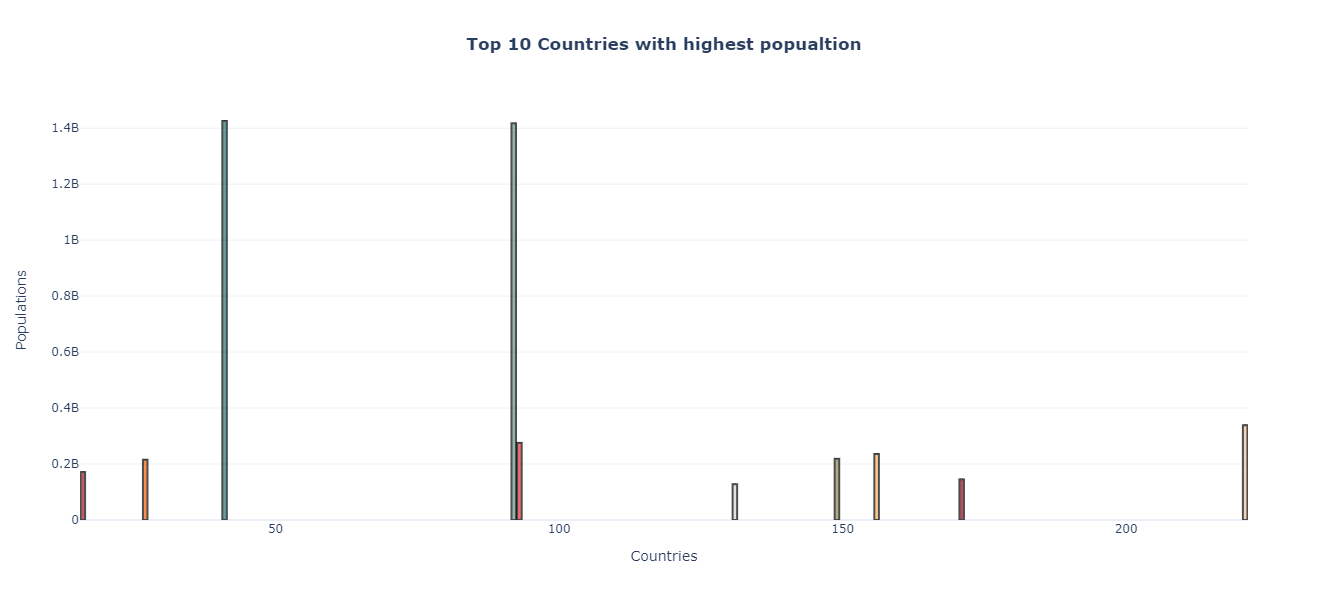

In [44]:
data = go.Bar(x = top_pop['Country'], y = top_pop['2022'], text = top_pop['2022'],textposition ='outside',
              textfont = dict(size = 30,
                             color = 'black'),
              marker = dict(color = colors,
                            opacity = 0.7,
                            line_color = 'black',
                            line_width = 2))
layout = go.Layout(title = {'text': "<b>Top 10 Countries with highest popualtion</b>",
                           'x':0.5,
                           'xanchor': 'center'},
                   xaxis = dict(title='Countries' ),
                   yaxis =dict(title='Populations'),
                   width = 900,
                   height = 600,
                   template = 'plotly_white')
fig=go.Figure(data = data, layout = layout)

iplot(fig)

TypeError: unsupported operand type(s) for +: 'int' and 'str'

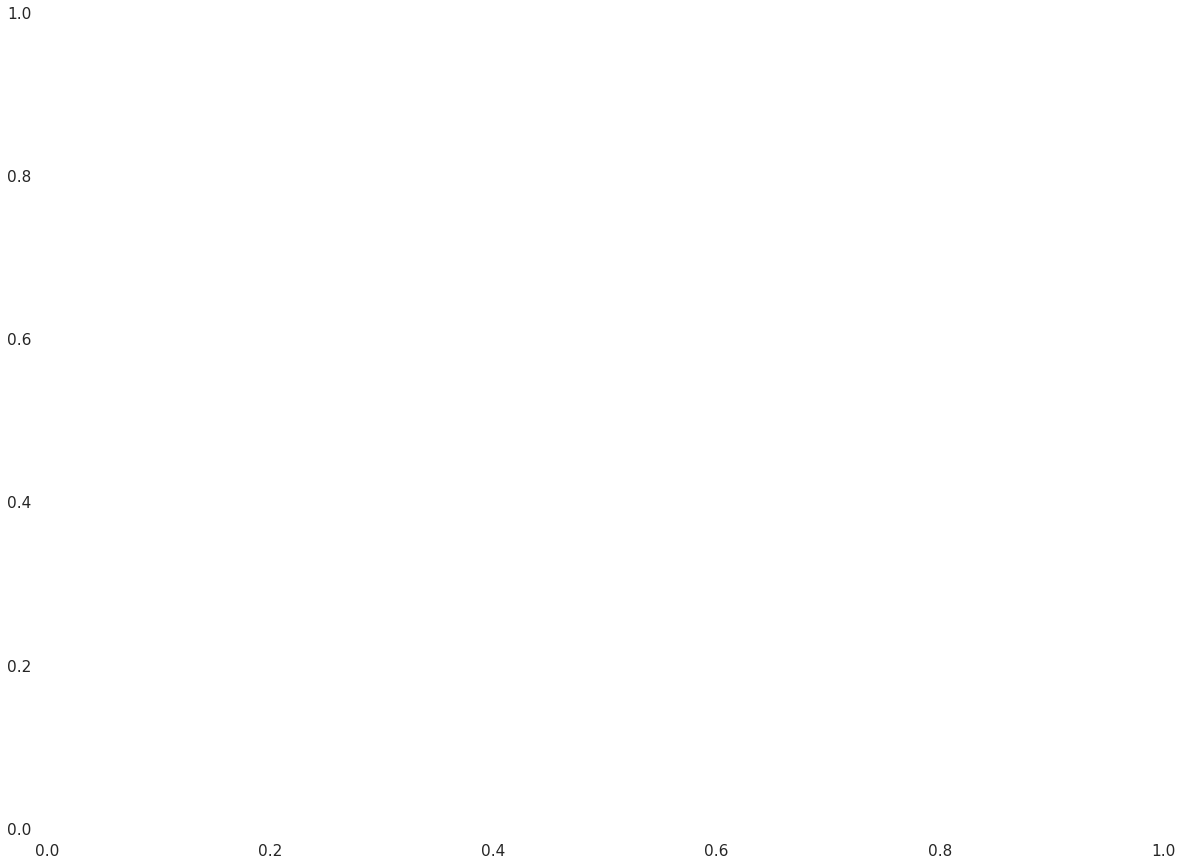

In [45]:
import squarify

y = top_pop

# Format each population value into readable format then store each country-value into a list
formatted_y_values = top_pop.apply
x = [f'{country}\n{count}' for country, count in zip(top_pop['Country'], top_pop)]

# Plot the treemap
fig = plt.figure(figsize=(20, 15))
squarify.plot(sizes=y, label=x, alpha=0.8, text_kwargs={"fontsize": 16, 'fontweight': 'bold', 'color': 'white'}, color=sns.color_palette("rocket", 10))

# Set the title
plt.title('Top 10 Ranked Countries\nBased on 2022\'s Population', size=30, fontweight="bold", y=1.01)
# Show the plot
plt.show()

* From above graph, we can see that China is the country with highest poulation of 1.42B in the world & India is the second country with population of 1.41B.

# What are the top 10 Countries with lowest popualtion?

In [ ]:
less_pop = df.sort_values(by = '2022', ascending = True).head(10)
less_pop[['Country', '2022']]

In [ ]:
data = go.Bar(x = less_pop['Country'], y = less_pop['2022'],text = less_pop['2022'],textposition ='outside',
              textfont = dict(size = 10,
                             color = 'black'),
             marker = dict(color = colors, opacity = 0.7, line_color = 'black', line_width = 2))
layout = go.Layout(title = {'text' : '<b>Top 10 Countries with lowest popualtion</b>', 'x' : 0.5},
                   xaxis = dict(title = '<b>Countries</b>'),
                   yaxis = dict(title = '<b>Population</b>'),
                   width = 900,
                   height = 700,
                   template = 'plotly_white')
fig = go.Figure(data = data, layout = layout)
fig.update_xaxes(tickangle=90,tickfont_size = 12)
iplot(fig)

* Vatican City is the country with lowest population of 510

In [ ]:
cont_pop = df.groupby('Continent',)[['World Population Percentage']].sum().sort_values(by = 'World Population Percentage', ascending = False)
cont_pop

In [ ]:
fig = go.Figure(data = go.Pie(labels = cont_pop.index, values = cont_pop['World Population Percentage'].values))
fig.update_traces(hoverinfo='label',
                  hole = 0.4,
                  textfont_size = 18,
                  textposition ='auto',
                  marker=dict(colors = colors,
                              line = dict(color = 'white',
                                          width = 2)))
fig.update_layout(title ={'text' : '<b>Continent with World Population Percentage</b>', 
                          'x' : 0.21},
                          template = 'xgridoff',
                          width = 900, height = 600,
                     legend=dict(
                        title_font_family="Times New Roman",
                        font=dict(
                        family="Courier",
                        size=20,
                        color="black" 
                        ),
                        bgcolor="white",
                        bordercolor="Black",
                        borderwidth=2.5)
                 )
iplot(fig)

* Asia is the Continent with 59.2% of highest World population percentage and Oceania continent have only 0.55% of lowest world poulation precentage.

# What are the top 5 Countries with highest popualtion of each Continet?

In [ ]:
# Making function which gives the top5 countries with highest population of continent
def get_cont_top5_country(continent):
    return df[df['Continent'] == continent].groupby('Country')[['2022']].sum().sort_values(by = '2022', ascending=False).head(5)

In [ ]:
# Storing the contitnet top5 countries data with same continent names
Asia = get_cont_top5_country('Asia')
Europe = get_cont_top5_country('Europe')
Africa = get_cont_top5_country('Africa')
North_America = get_cont_top5_country('North America')
South_America = get_cont_top5_country('South America')
Oceania = get_cont_top5_country('Oceania')

In [ ]:
# Making subplots with 3 Rows & Columns
fig = make_subplots(rows=3, cols=2, subplot_titles=("Asia", 'Europe', "Africa", "Oceania", 'Nort America', 'South America'))

# Asia
fig.add_trace(go.Bar(x = Asia.index, y = Asia['2022'], text = Asia['2022'],textposition ='auto',

              textfont = dict(size = 10,
                             color = 'black'),
              marker = dict(color = colors,
                            opacity = 0.7,
                            line_color = 'black',
                            line_width = 2)),
             row = 1, col =1)
# Europe
fig.add_trace(go.Bar(x = Europe.index, y = Europe['2022'], text = Europe['2022'],textposition ='auto',
              textfont = dict(size = 10,
                             color = 'black'),
              marker = dict(color = colors,
                            opacity = 0.7,
                            line_color = 'black',
                            line_width = 2)),
                                  row = 1, col =2)
# Africa
fig.add_trace(go.Bar(x = Africa.index, y = Africa['2022'], text = Africa['2022'],textposition ='auto',
              textfont = dict(size = 10,
                             color = 'black'),
              marker = dict(color = colors,
                            opacity = 0.7,
                            line_color = 'black',
                            line_width = 2)),
                                  row = 2, col =1)
# Oceania
fig.add_trace(go.Bar(x = Oceania.index, y = Oceania['2022'], text = Oceania['2022'],textposition ='auto',
              textfont = dict(size = 10,
                             color = 'black'),
              marker = dict(color = colors,
                            opacity = 0.7,
                            line_color = 'black',
                            line_width = 2)),
                                  row = 2, col =2)

# Nort America
fig.add_trace(go.Bar(x = North_America.index, y = North_America['2022'], text = North_America['2022'],textposition ='auto',
              textfont = dict(size = 10,
                             color = 'black'),
              marker = dict(color = colors,
                            opacity = 0.7,
                            line_color = 'black',
                            line_width = 2)),
                                  row = 3, col =1)
# South America
fig.add_trace(go.Bar(x = South_America.index, y = South_America['2022'], text = South_America['2022'],
                     textposition ='auto',
              textfont = dict(size = 10,
                             color = 'black'),
              marker = dict(color = colors,
                            opacity = 0.7,
                            line_color = 'black',
                            line_width = 2)),
                                  row = 3, col =2)

# updating Layout
fig.update_layout(title = {'text': ' <b>Top 5 Countries with highest popualtion of Continet</b> ',
                           'x':0.5,
                           'xanchor': 'center'},
                   width = 1000,
                   height = 1000,
                   showlegend = False,
                   template = 'plotly_white')
#  xaxis title
fig.update_xaxes(tickangle = 0)
fig.update_xaxes(tickangle = 10, row=2, col=2)
fig.update_xaxes(title_text="<b>Countries</b>", row=3, col=1)
fig.update_xaxes(title_text="<b>Countries</b>", row=3, col=2)

# yaxis title
fig.update_yaxes(title_text="<b>Population</b>", row = 1, col=1)
fig.update_yaxes(title_text="<b>Population</b>", row = 2, col=1)
fig.update_yaxes(title_text="<b>Population</b>", row = 3, col=1)

iplot(fig)


* In Asia Continent the Country with Highest Population is China with population of 1.42 Billions.
* In Europe Continent the Country with Highest Population is Russia with population of 144.71 Millions.
* In Africa Continent the Country with Highest Population is Nigeria with population of 218.54 Millions.
* In Oceania Continent the Country with Highest Population is Australia with population of 26.17 Millions.
* In North America Continent the Country with Highest Population is United State with population of 338.28 Millions.
* In South America Continent the Country with Highest Population is Brazil with population of 215.31 Millions.

# What are the top 5 Countries with lowest popualtion of each Continet?

In [ ]:
# Making function which gives the bottom5 countries with lowest population of continent
def get_cont_bott5_country(continent):
    return df[df['Continent'] == continent].groupby('Country')[['2022']].sum().sort_values(by = '2022', ascending=True).head(5)

In [ ]:
# Storing the contitnet bott5 countries data 
bott5_Asia = get_cont_bott5_country('Asia')
bott5_Europe = get_cont_bott5_country('Europe')
bott5_Africa = get_cont_bott5_country('Africa')
bott5_North_America = get_cont_bott5_country('North America')
bott5_South_America = get_cont_bott5_country('South America')
bott5_Oceania = get_cont_bott5_country('Oceania')

In [ ]:
# Making subplots with 3 Rows & Columns
fig = make_subplots(rows=3, cols=2, subplot_titles=("Asia", 'Europe', "Africa", "Oceania", 'Nort America', 'South America'))

# Asia
fig.add_trace(go.Bar(x = bott5_Asia.index, y = bott5_Asia['2022'], text = bott5_Asia['2022'],textposition ='auto',

              textfont = dict(size = 10,
                             color = 'black'),
              marker = dict(color = colors,
                            opacity = 0.7,
                            line_color = 'black',
                            line_width = 2)),
             row = 1, col =1)
# Europe
fig.add_trace(go.Bar(x = bott5_Europe.index, y = bott5_Europe['2022'], text = bott5_Europe['2022'],textposition ='auto',
              textfont = dict(size = 10,
                             color = 'black'),
              marker = dict(color = colors,
                            opacity = 0.7,
                            line_color = 'black',
                            line_width = 2)),
                                  row = 1, col =2)

# Africa
fig.add_trace(go.Bar(x = bott5_Africa.index, y = bott5_Africa['2022'], text = bott5_Africa['2022'],textposition ='auto',
              textfont = dict(size = 10,
                             color = 'black'),
              marker = dict(color = colors,
                            opacity = 0.7,
                            line_color = 'black',
                            line_width = 2)),
                                  row = 2, col =1)
# Oceania
fig.add_trace(go.Bar(x = bott5_Oceania.index, y = bott5_Oceania['2022'], text = bott5_Oceania['2022'],textposition ='auto',
              textfont = dict(size = 10,
                             color = 'black'),
              marker = dict(color = colors,
                            opacity = 0.7,
                            line_color = 'black',
                            line_width = 2)),
                                  row = 2, col =2)

# Nort America
fig.add_trace(go.Bar(x = bott5_North_America.index, y = bott5_North_America['2022'], text = bott5_North_America['2022'],textposition ='auto',
              textfont = dict(size = 10,
                             color = 'black'),
              marker = dict(color = colors,
                            opacity = 0.7,
                            line_color = 'black',
                            line_width = 2)),
                                  row = 3, col =1)
# South America
fig.add_trace(go.Bar(x = bott5_South_America.index, y = bott5_South_America['2022'], text = bott5_South_America['2022'],
                     textposition ='outside',
              textfont = dict(size = 10,
                             color = 'black'),
              marker = dict(color = colors,
                            opacity = 0.7,
                            line_color = 'black',
                            line_width = 2)),
                                  row = 3, col =2)

# updating Layout
fig.update_layout(title = {'text': ' <b>bottom 5 Countries with Lowest popualtion of Continet</b> ',
                           'x':0.5,
                           'xanchor': 'center'},
                   width = 1000,
                   height = 900,
                   showlegend = False,
                   template = 'plotly_white')
#  xaxis title
fig.update_xaxes(tickangle = 0)
fig.update_xaxes(tickangle = 25, row=2, col=1)
fig.update_xaxes(tickangle = 25, row=3, col=1)
fig.update_xaxes(tickangle = 25, row=3, col=2)
fig.update_xaxes(title_text="<b>Countries</b>", row=3, col=1)
fig.update_xaxes(title_text="<b>Countries</b>", row=3, col=2)

# yaxis title
fig.update_yaxes(title_text="<b>Population</b>", row = 1, col=1)
fig.update_yaxes(title_text="<b>Population</b>", row = 2, col=1)
fig.update_yaxes(title_text="<b>Population</b>", row = 3, col=1)

iplot(fig)


* In Europe Continent the Country with Lowest Population is Vatican City with population of 510 only.
* In Africa Continent the Country with Lowest Population is Seychelles with population of 107.11 Thousands.
* In Oceania Continent the Country with Lowest Population is Tokelau with population of 1.87 Thousands.
* In North America Continent the Country with Lowest Population is Montserrat with population of 4.39 Thousands.
* In South America Continent the Country with Lowest Population is Falak land Island with population of 3.78 Thousands.

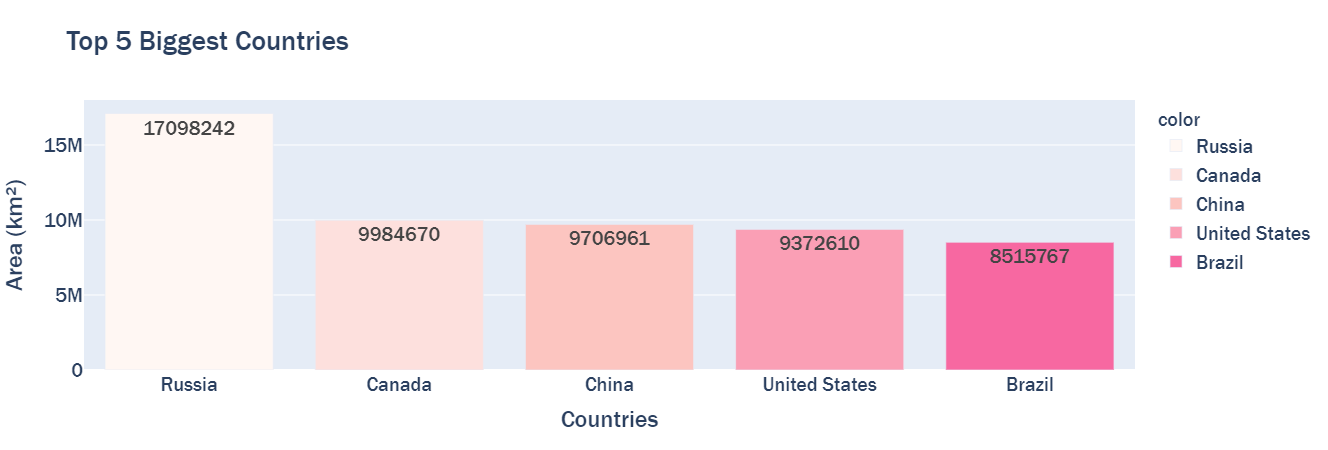

In [56]:
area_country = df.groupby(by = 'Country')['Area (km²)'].sum().sort_values(ascending=False).head()
fig = px.bar(y=area_country.values, 
             x=area_country.index, 
             color = area_country.index,
             color_discrete_sequence=px.colors.sequential.RdPu,
             text=area_country.values,
             title= 'Top 5 Biggest Countries',
             )
fig.update_layout(
    xaxis_title="Countries",
    yaxis_title="Area (km²)",
    font = dict(size=20,family="Franklin Gothic"))
fig.show()

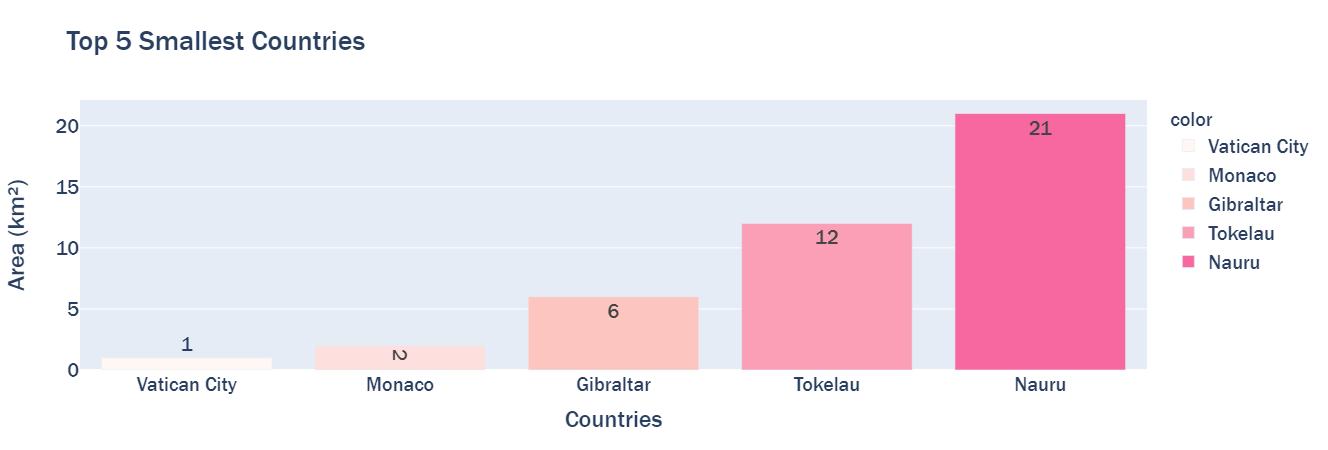

In [57]:
area_country_2 = df.groupby(by = 'Country')['Area (km²)'].sum().sort_values(ascending=True).head()
fig = px.bar(y=area_country_2.values, 
             x=area_country_2.index, 
             color = area_country_2.index,
             color_discrete_sequence=px.colors.sequential.RdPu,
             text=area_country_2.values,
             title= 'Top 5 Smallest Countries',
             )
fig.update_layout(
    xaxis_title="Countries",
    yaxis_title="Area (km²)",
    font = dict(size=20,family="Franklin Gothic"))
fig.show()

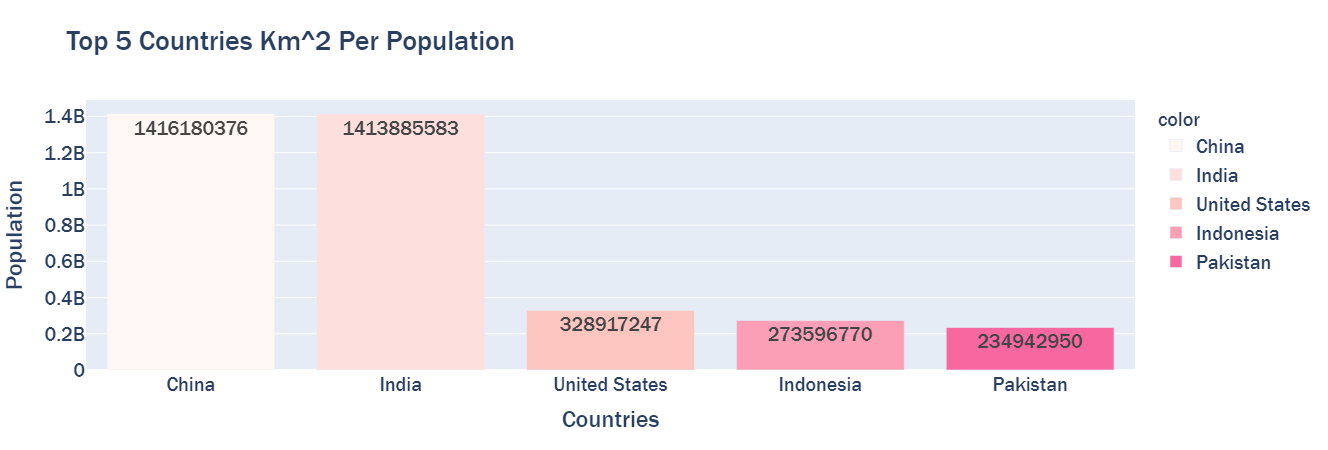

In [58]:
m2_per_pop = ((df.groupby(by = 'Country')['2022'].sum()) - 
              (df.groupby(by ='Country')['Area (km²)'].sum())).sort_values(ascending=False).head()
fig = px.bar(y=m2_per_pop.values, 
             x=m2_per_pop.index, 
             color = m2_per_pop.index,
             color_discrete_sequence=px.colors.sequential.RdPu,
             text=m2_per_pop.values,
             title= 'Top 5 Countries Km^2 Per Population',
             )
fig.update_layout(
    xaxis_title="Countries",
    yaxis_title="Population",
    font = dict(size=20,family="Franklin Gothic"))
fig.show()

* As we see Russia by far biggest country in the world.

* If we look at the side of data density per population China and India too much crowded than the other countries.

<p style =font-family:"verdana";> Africa is the Continent with highest growth rate, Asia continent has the highest population & largest World population percentage of 59.2 the country with the highest population is China and on second is India, the population growth difference of 859.67 Millions, China from (1970 to 2022) is 603.35 Millions and population growth difference of India from (1970 to 2022) is 859.67 and probaly after 10 years India will surpass the China and will become Top1 country with highest Population, population growth of Europe seems to be very low and in Europe Vatican City is the country with the lowest population from all over the world, Moldova have the highest population growth rate of 1.069 and Ukraine is the country with lowest growth rate of 0.921</p>.